In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 19 14:30:48 2018

@author: maxime univ rouen professor
"""
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.neighbors import kneighbors_graph
from sklearn.utils.graph import graph_shortest_path

from scipy.linalg import eigh
import scipy.sparse as sparse

from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

IRIS = True
MNIST = False

if IRIS:
    titre1 ='myLaplacian Eigenmap - IRIS'
    titre2 ='Laplacian Eigenmap - IRIS'
    iris = datasets.load_iris()
    X = iris.data  
    y = iris.target
    
    N = X.shape[0]
    n_components = 2
    n_neighbors = 4
elif MNIST:
    titre1 = 'myLaplacian Eigenmap - MNIST'
    titre2 = 'Laplacian Eigenmap - IRIS'
    digits = datasets.load_digits(n_class=6)
    X = digits.data
    y = digits.target
    
    N = X.shape[0]
    n_components = 2
    n_neighbors = 4

print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
print('labels: %s' % np.unique(y))
print('Class distribution: %s' % np.bincount(y))

Dimensions: 150 x 4
labels: [0 1 2]
Class distribution: [50 50 50]


[-6.07792283e-16 -3.33899535e-16  1.21879798e-02  3.11427889e-02
  3.42244214e-02  8.50239046e-02]
[-1.51502523e-16  4.34819343e-17  7.48117066e-03  2.20343493e-02
  2.75609628e-02  5.73730806e-02]
SCIKITLEARN LAPLACIAN EIGNEMAPS


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:145: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:216: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


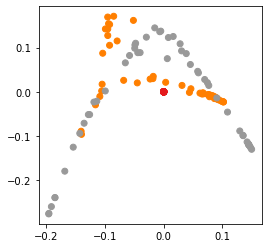

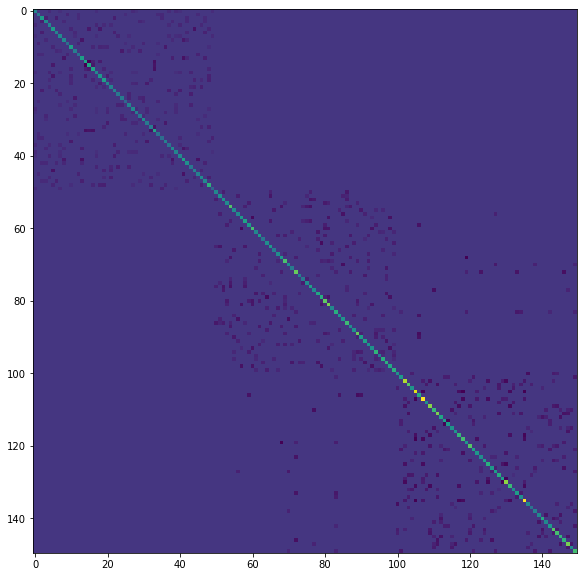

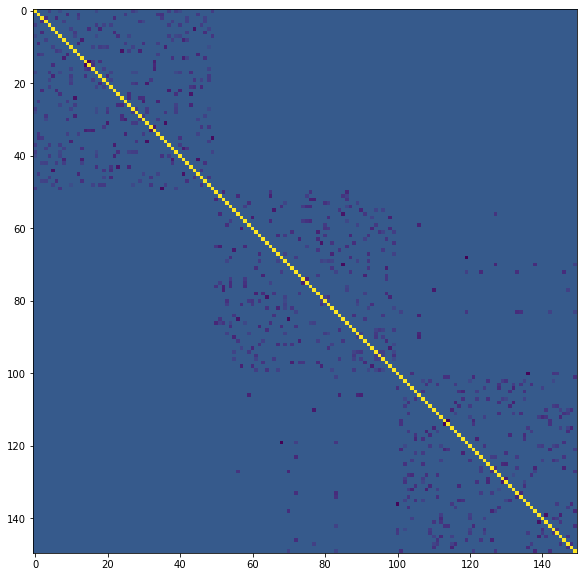

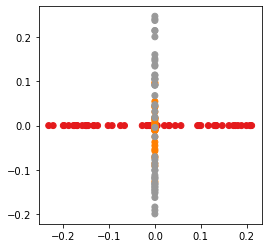

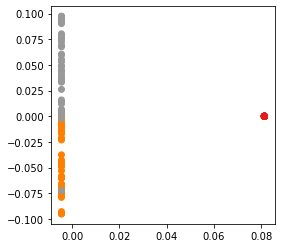

In [2]:
#----------------------------------------------------------------------
# Laplacian Eigenmaps 

# Step 1 
kng = kneighbors_graph(X[0:N], n_neighbors,mode='distance')
# Par construction une matrice creuse au format CSR 
#print(kng)

## on visualise le haut gauche de la matrice "densifiée" 
#plt.figure()
#plt.imshow(kng.todense()[0:20,0:20])#[0:20,0:20])
##
#### on symmétrise le graphe
W = 0.5*(kng + kng.T)

#plt.figure()
#plt.imshow(W.todense()[0:20,0:20])

#
### On calcul la matrice des adjacences
D = sparse.diags(np.asarray(W.sum(axis=0)).flatten())
#print(D)
#D = D.tocsc() 
Laplacian = D-W

[yl,YL] = sparse.linalg.eigsh(Laplacian,k=6,which='SM') #,sigma=1.0)
print(yl)
#print(YL)
fig, ax = plt.subplots(figsize=(4,4))
scatter = ax.scatter(YL[:,4], YL[:,5], c=y[0:N], cmap=plt.cm.Set1)
#legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title=titre1)
#ax.add_artist(legend1) 

## Si on normalise le Laplacien
Dinv = sparse.linalg.inv(D)
Dinv = Dinv.sqrt()
NormLaplacian = Dinv@Laplacian@Dinv


plt.figure(figsize=(10,10))
plt.imshow(Laplacian.todense())
plt.figure(figsize=(10,10))
plt.imshow(NormLaplacian.todense())

#NormLaplacian = NormLaplacian.tocsc()
## k = number de vecteurs propres         LM = Largest Magnitude
[yl,YL] = sparse.linalg.eigsh(NormLaplacian,k=6,which='SM')
print(yl)
#
fig, ax = plt.subplots(figsize=(4,4))
scatter = ax.scatter(YL[:,4], YL[:,5], c=y[0:N], cmap=plt.cm.Set1)
#legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title=titre)
#ax.add_artist(legend1) 

##----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("SCIKITLEARN LAPLACIAN EIGNEMAPS")
Lap_Eig = manifold.SpectralEmbedding(n_components=2 ,affinity='nearest_neighbors',random_state=0,n_neighbors=n_neighbors,eigen_solver="arpack")

#affinity='nearest_neighbors'
L_E = Lap_Eig.fit_transform(X[0:N])

fig, ax = plt.subplots(figsize=(4,4))
scatter = ax.scatter(L_E[:,0], L_E[:,1], c=y[0:N], cmap=plt.cm.Set1)
#legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title = "Scikitlearn : Laplacian")
#ax.add_artist(legend1) 


